\begin{equation}
\pdv{U}{t}=\kappa(U_0-U)-\frac{\alpha U C_1}{1+b_1C_1}
\end{equation}
\begin{equation}
\pdv{I}{t}=\frac{\alpha U C_1}{1+b_1C_1}-\beta I
\end{equation}
\begin{equation}
\pdv{C_1}{t}=d_{C_1}\pdv[{2}]{C_1}{x}+\frac{a_1C_1M_1}{1+b_2C_1+d_1C_2}+\frac{k_1I}{1+d_2C_2}-\gamma_1 C_1
\end{equation}
\begin{equation}
\pdv{M_1}{t}=d_{M_1}\pdv[{2}]{M_1}{x}+\frac{a_3C_1}{1+b_3C_1}-\gamma_3 M_1
\end{equation}

## Implicit

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#Parameters of the model
kappa = 0.1
alpha = 0.2
B1 = 0.4
b2 = 0.4
b3 = 0.4
A1 = 0.1
k1 = 0.5
g1 = 0.2
g3 = 0.2

beta = 1.1
a3 = 0.55

D_C1 = 10**(-4)
D_M1 = 10**(-4)

In [27]:
#Initial conditions
U_0 = 2.0
I_0 = 0.0
M1_0 = 0.5
C1_0 = 0.08

In [28]:
M = 4000 #space partitioning
T = 100
L  = 4
h = L/M  #space step

#tau = 0.1
#N = int(T/tau) #time partitioning

N = 1000
tau = T/N

x = np.linspace(0, L, M+1)
t = np.linspace(0, T, N+1)

In [29]:
h

0.001

In [30]:
N

1000

In [31]:
tau

0.1

In [32]:
M

4000

In [33]:
U = np.zeros([N+1, M+1])
I = np.zeros([N+1, M+1])
C1 = np.zeros([N+1, M+1])
M1 = np.zeros([N+1, M+1])

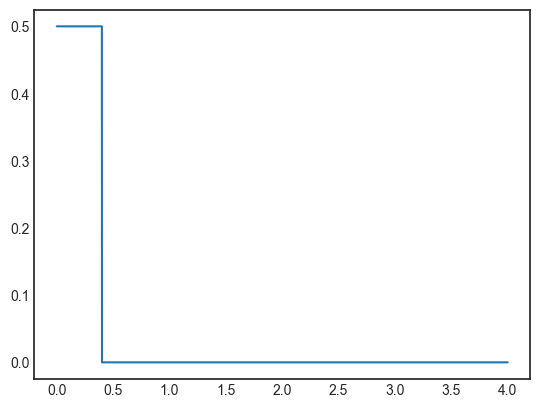

In [34]:
U[0,:] = U_0
I[0,:] = I_0
M1[0] = np.ones(M + 1) * M1_0
M1[0, 401::] = 0
plt.plot(x, M1[0])
plt.show()

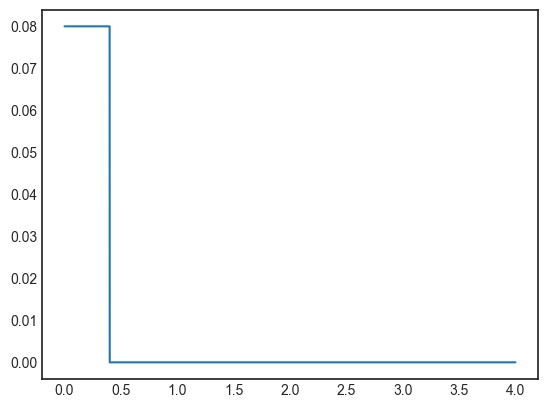

In [35]:
C1[0] = np.ones(M + 1) * C1_0
C1[0, 401::] = 0
plt.plot(x, C1[0])
plt.show()

In [36]:
# a - lower diag, b - main diag, c - upper diag, d - sol

def Thomas_Method(a, b, c, d):
    n = len(a)
    res = np.zeros(n)

    w = np.zeros(n - 1)
    g = np.zeros(n)

    w[0] = c[0]/b[0] # c'_1
    g[0] = d[0]/b[0] # d'_1

    for i in range(1, n - 1):
        w[i] = c[i] / (b[i] - a[i] * w[i - 1])
        g[i] = (d[i] - a[i]* g[i - 1]) / (b[i] - \
                                                      a[i] * w[i - 1])

    g[n - 1] = (d[n - 1] - a[n - 1]* g[n - 2]) / (b[n - 1] - \
                                                     a[n - 1] * w[n - 2])
    res[n - 1] = g[n - 1]
    for i in range(n - 2, -1, -1 ):
        res[i] = g[i] - w[i] * res[i + 1]
    return res

In [37]:
s1 = (D_C1*tau)/(h**2)
s2 = (D_M1*tau)/(h**2)

In [38]:
for i in range(1, N+1):
    a = np.zeros(M+1)
    b = np.zeros(M+1)
    c = np.zeros(M+1)
    d = np.zeros(M+1)
    a[0] = 0
    a[1:M+1] = -s1
    b[0] = 1 +s1
    b[1:M] = 1 + 2*s1
    b[M] = 1+s1
    c[0:M] = -s1
    c[M] = 0
    d[0:M+1] = (tau*A1*C1[i-1,0:M+1]*M1[i-1,0:M+1])/(1+b2*C1[i-1,0:M+1]) + tau*k1*I[i-1,0:M+1] + (1 -tau*g1)*C1[i-1,0:M+1]

    a1 = np.zeros(M+1)
    b1 = np.zeros(M+1)
    c1 = np.zeros(M+1)
    d1 = np.zeros(M+1)
    a1[0] = 0
    a1[1:M+1]= -s2
    b1[0] =1 + s2
    b1[1:M] = 1 + 2*s2
    b[M] = 1+s2
    c1[0:M]=  -s2
    c1[M]= 0
    d1[0:M+1] = (tau*a3*C1[i-1,0:M+1])/(1+b3*C1[i-1,0:M+1])  + (1 - tau*g3)*M1[i-1,0:M+1]

    C1[i] = Thomas_Method(a, b, c, d)
    M1[i] = Thomas_Method(a1, b1, c1, d1)
    U[i]=kappa*tau*U_0 + (1-kappa*tau)*U[i-1]-tau*(alpha*U[i-1]*C1[i-1])/(1+B1*C1[i-1])
    I[i]=tau*(alpha*U[i-1]*C1[i-1])/(1+B1*C1[i-1]) + (1-beta*tau)*I[i-1]

C:\Users\Acer\AppData\Local\Temp\ipykernel_13164\1416064529.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


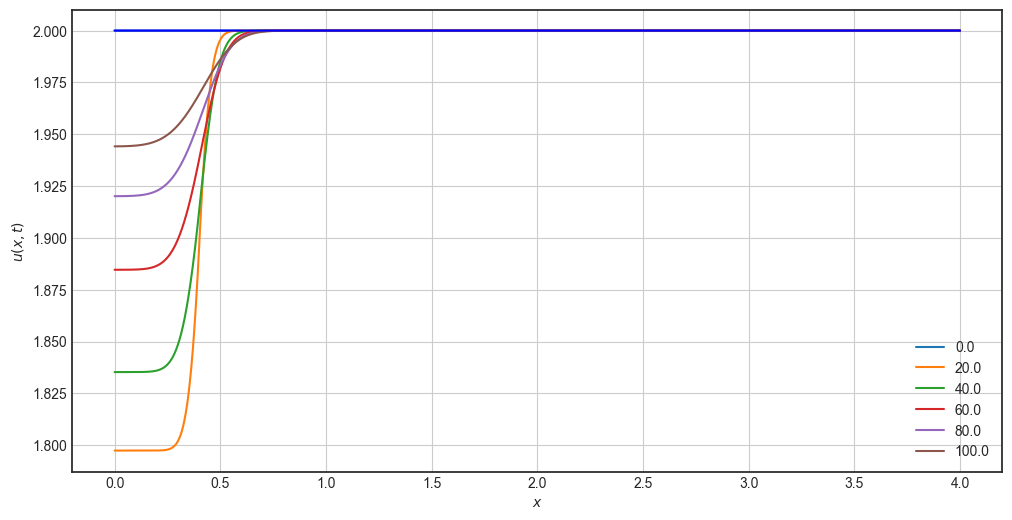

In [39]:
plt.style.use('seaborn-white')
plt.figure(figsize=(12,6))
#plt.title("Concentration of uninfected cells at different time points")

for i in range(0, N+1,N//5):
    plt.plot(x, U[i],label = t[i])

plt.plot(x, U[0], c = 'blue')

plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.grid()
plt.legend()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13164\1419770970.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


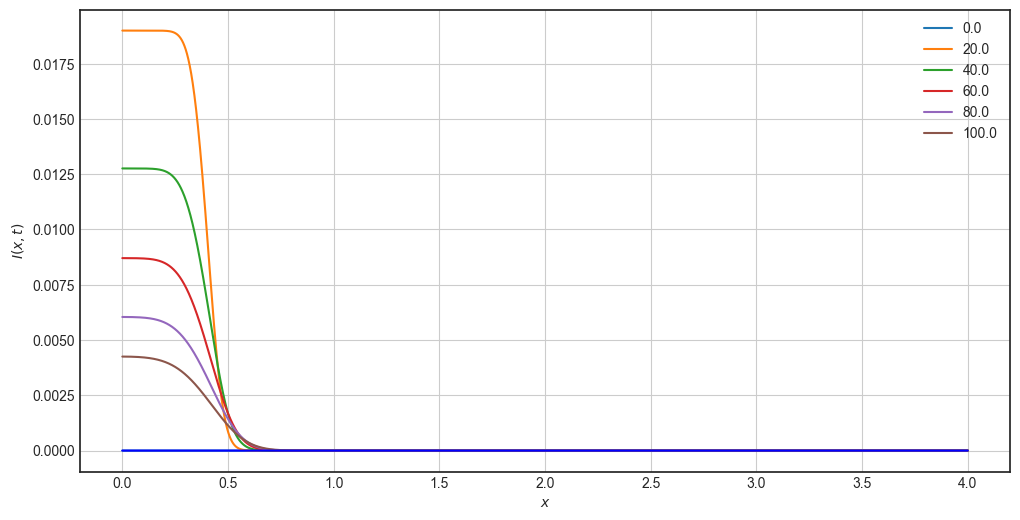

In [40]:
plt.style.use('seaborn-white')
plt.figure(figsize=(12,6))
#plt.title("Concentration of infected cells of the circuit at different time points")

for i in range(0, N+1,N//5):
    plt.plot(x, I[i], label = t[i])

plt.plot(x, I[0], c = 'blue')


plt.xlabel('$x$')
plt.ylabel('$I(x,t)$')
plt.grid()
plt.legend()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13164\3141252413.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


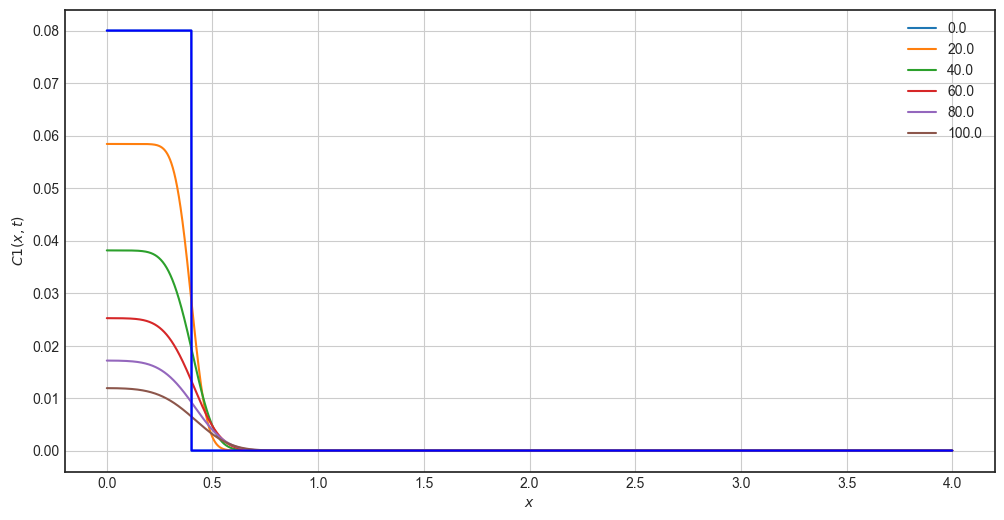

In [41]:
plt.style.use('seaborn-white')
plt.figure(figsize=(12,6))
#plt.title("Cytokines concentration at different time points")

for i in range(0, N+1,N//5):
    plt.plot(x, C1[i],label = t[i] )

plt.plot(x, C1[0], c = 'blue')

plt.xlabel('$x$')
plt.ylabel('$C1(x,t)$')
plt.grid()
plt.legend()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_13164\13019968.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


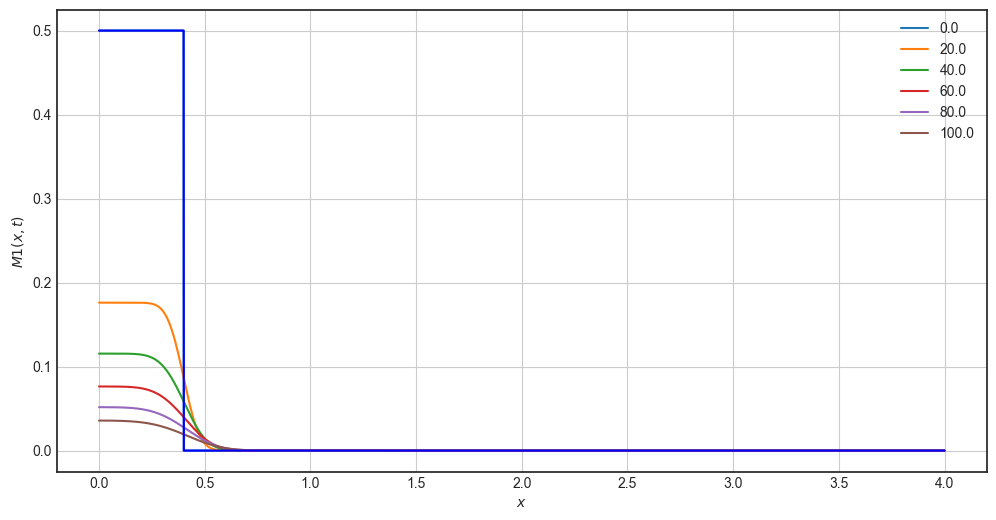

In [42]:
plt.style.use('seaborn-white')
plt.figure(figsize=(12,6))
#plt.title("Macrophages concentration at different time points")

for i in range(0, N+1,N//5):
    plt.plot(x, M1[i],label = t[i] )

plt.plot(x, M1[0], c = 'blue')

plt.xlabel('$x$')
plt.ylabel('$M1(x,t)$')
plt.grid()
plt.legend()
plt.show()